In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
from google.colab import files

uploaded = files.upload()

Saving 202501_기준금속.xlsx to 202501_기준금속 (1).xlsx


In [16]:
df = pd.read_excel('202501_기준금속.xlsx')

In [17]:
# 금속 컬럼 추출
column_pattern = ['(ng/m3)', '(ug/m3)']
columns_to_analyze = [c for c in df.columns if any(p in c for p in column_pattern)]

In [18]:
# 산점도, 회귀선 함수 정의
def plot_scatter_with_regression(x, y, data, ax):
    # x축과 y축 데이터 추출
    X = data[[x]].dropna()
    Y = data[y].dropna()
    merged = pd.concat([X, Y], axis=1).dropna()

    # 산점도 그리기
    sns.scatterplot(x=x, y=y, data=merged, ax=ax)

    # 회귀선 계산
    X_vals = merged[[x]].values
    Y_vals = merged[y].values
    model = LinearRegression().fit(X_vals, Y_vals)
    y_pred = model.predict(X_vals)

    # 회귀선 그리기
    ax.plot(X_vals, y_pred, color="red", linewidth=2)

    # R^2 값 계산
    r2 = model.score(X_vals, Y_vals)

    # 그래프 제목에 R^2 표시
    ax.set_title(f"{x} vs {y}\nR² = {r2:.3f}")

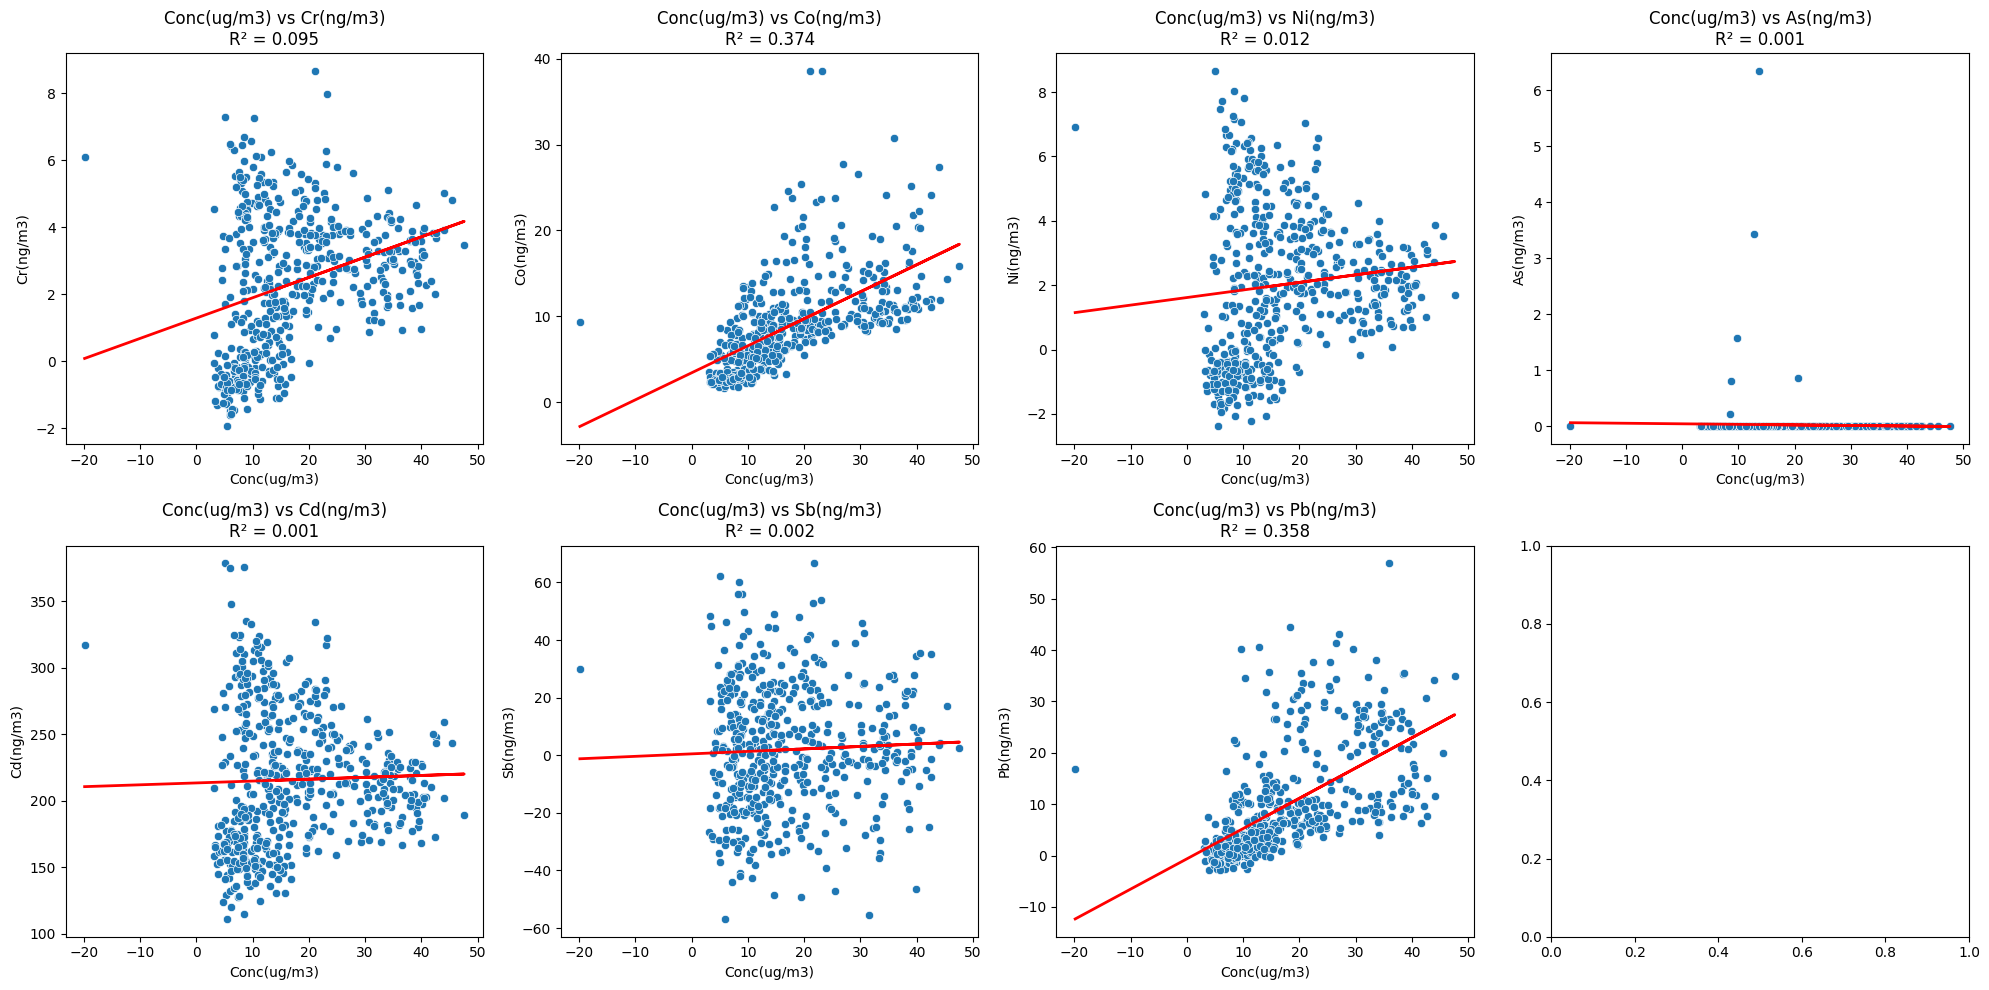

In [33]:
# 산점도 그래프 생성
fig, axes = plt.subplots(2, 4, figsize=(20,10))
axes = axes.flatten()

for i, metal in enumerate(columns_to_analyze[1:]):  # Conc 제외 금속들만
    plot_scatter_with_regression('Conc(ug/m3)', metal, df, axes[i])

plt.tight_layout()
plt.show()